In [2]:
! conda activate my-conda-env          # activate environment in terminal         
! jupyter notebook                     # start server + kernel inside my-conda-env

KeyboardInterrupt: 

In [55]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
chunksize=100000
import seaborn as sns
import matplotlib.pyplot as plt


Load each table

In [4]:
ratings_1 = pd.read_csv('../ml-20m/ratings.csv')
print(ratings_1.head(10))
print(ratings_1.info())

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB
None


I notice the types are not being imported correctly. the ids should be strings, as they are not numbers. The timestamp could be converted to a Panda datetime object. This can all be achieved using the read_csv arguments. I  am also setting the chunk size to 500,000 so my computer RAM won't get full

In [5]:


# ratings
# ratings = pd.DataFrame()  # initialize an empty dataframe
# for index, chunk in enumerate(pd.read_csv('../ml-20m/ratings.csv',
#                          dtype={'userId': str, 'movieId': str, "rating": float, 'timestamp': int},
#                          chunksize=chunksize,
#                          parse_dates=['timestamp'],
#                          date_parser=pd.to_datetime
#                          )):
#     # Perform operations on the chunk
#     # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
#     ratings = pd.concat([ratings, chunk])
#     print(f"Chunk {index} loaded")
# print("Ratings dataset loaded")

In [6]:
# print(ratings.head(10))

I noticed the timestamp is not being imported correctly. It should be a full date, but instead it was imported as milliseconds

In [7]:
# Custom date parser function
date_parser = lambda x: pd.to_datetime(x, unit='s')

# ratings
ratings = pd.DataFrame()  # initialize an empty dataframe
for index, chunk in enumerate(pd.read_csv('../ml-20m/ratings.csv',
                         dtype={'userId': str, 'movieId': str, "rating": float, 'timestamp': int},
                         chunksize=chunksize,
                         parse_dates=['timestamp'],
                         date_parser=date_parser
                         )):
    # Perform operations on the chunk
    # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
    ratings = pd.concat([ratings, chunk])
    print(f"Chunk {index} loaded")
print("Ratings dataset loaded")

Chunk 0 loaded


/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_3418/3003964684.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  for index, chunk in enumerate(pd.read_csv('../ml-20m/ratings.csv',


Chunk 1 loaded
Chunk 2 loaded
Chunk 3 loaded
Chunk 4 loaded
Chunk 5 loaded
Chunk 6 loaded
Chunk 7 loaded
Chunk 8 loaded
Chunk 9 loaded
Chunk 10 loaded
Chunk 11 loaded
Chunk 12 loaded
Chunk 13 loaded
Chunk 14 loaded
Chunk 15 loaded
Chunk 16 loaded
Chunk 17 loaded
Chunk 18 loaded
Chunk 19 loaded
Chunk 20 loaded
Chunk 21 loaded
Chunk 22 loaded
Chunk 23 loaded
Chunk 24 loaded
Chunk 25 loaded
Chunk 26 loaded
Chunk 27 loaded
Chunk 28 loaded
Chunk 29 loaded
Chunk 30 loaded
Chunk 31 loaded
Chunk 32 loaded
Chunk 33 loaded
Chunk 34 loaded
Chunk 35 loaded
Chunk 36 loaded
Chunk 37 loaded
Chunk 38 loaded
Chunk 39 loaded
Chunk 40 loaded
Chunk 41 loaded
Chunk 42 loaded
Chunk 43 loaded
Chunk 44 loaded
Chunk 45 loaded
Chunk 46 loaded
Chunk 47 loaded
Chunk 48 loaded
Chunk 49 loaded
Chunk 50 loaded
Chunk 51 loaded
Chunk 52 loaded
Chunk 53 loaded
Chunk 54 loaded
Chunk 55 loaded
Chunk 56 loaded
Chunk 57 loaded
Chunk 58 loaded
Chunk 59 loaded
Chunk 60 loaded
Chunk 61 loaded
Chunk 62 loaded
Chunk 63 loaded
C

In [8]:
print(ratings.head(10))

  userId movieId  rating           timestamp
0      1       2     3.5 2005-04-02 23:53:47
1      1      29     3.5 2005-04-02 23:31:16
2      1      32     3.5 2005-04-02 23:33:39
3      1      47     3.5 2005-04-02 23:32:07
4      1      50     3.5 2005-04-02 23:29:40
5      1     112     3.5 2004-09-10 03:09:00
6      1     151     4.0 2004-09-10 03:08:54
7      1     223     4.0 2005-04-02 23:46:13
8      1     253     4.0 2005-04-02 23:35:40
9      1     260     4.0 2005-04-02 23:33:46


Now the time is fixed, I can use this approach going forward

In [9]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   movieId    object        
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 610.4+ MB
None


Ratings dataset has 20,000,263 entries. 4 columns considting of 

0   userId     object / string        
1   movieId    object / string        
2   rating     float64       
3   timestamp  datetime64[ns]

Now we will look at the summarty statistics of the dataset

In [10]:
# Set the float format to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
print(ratings.describe())
# Reset to default float format
pd.reset_option('display.float_format')

           rating                      timestamp
count 20000263.00                       20000263
mean         3.53  2004-11-20 02:32:01.677113984
min          0.50            1995-01-09 11:46:44
25%          3.00            2000-08-20 18:55:45
50%          3.50            2004-12-20 15:18:06
75%          4.00     2008-11-02 16:11:57.500000
max          5.00            2015-03-31 06:40:02
std          1.05                            NaN


We get a summary statisics of the table rating and timestamp columns. For ratings, the mean value is 3.53, the lower quartile 3, and the upper quartile is 4. Lets make a plot of this to explore it more.

I will use the seaborn plot library for this.

First, I will create a histogram to see the distribution of the ratings 

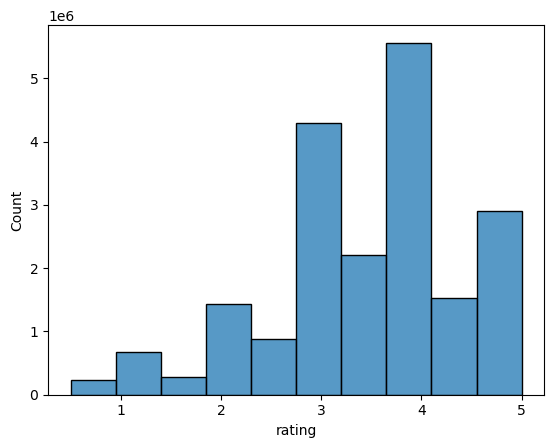

In [11]:

# Create a histogram for rating
sns.histplot(data=ratings, x='rating', bins=10)
plt.show()

The histogram could be improved upon, first I would like to see how many unique ratings there are

In [12]:
unique_values = ratings['rating'].unique().tolist()

print(unique_values)

[3.5, 4.0, 3.0, 4.5, 5.0, 2.0, 1.0, 2.5, 0.5, 1.5]


the ratings values can be either a whole or half unit from 0.5 up to 5 

In [13]:
# Create the count table
count_table = ratings['rating'].value_counts().reset_index()
count_table.columns = ['rating', 'count']

total = count_table["count"].sum()
count_table["percentage"] = round((count_table["count"]/total)*100, 0)
count_table = count_table.sort_values(by="rating")
# Print the count table
print(count_table)


   rating    count  percentage
9     0.5   239125         1.0
7     1.0   680732         3.0
8     1.5   279252         1.0
5     2.0  1430997         7.0
6     2.5   883398         4.0
1     3.0  4291193        21.0
3     3.5  2200156        11.0
0     4.0  5561926        28.0
4     4.5  1534824         8.0
2     5.0  2898660        14.0


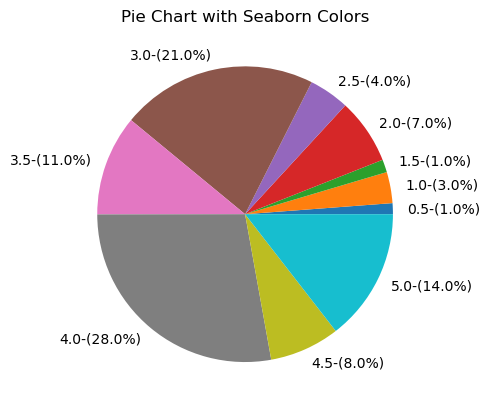

In [14]:
# Choose a Seaborn color palette
# colors = sns.color_palette('pastel')[0:4]
labels = [f"{rating}-({percentage}%)" for rating, percentage in zip(count_table["rating"], count_table["percentage"])]
# Create the pie chart
plt.pie(count_table['count'], labels=labels, 
        # colors=colors, autopct='%.0f%%'
        )
plt.title('Moview ratings percentages')
plt.show()

This looks intesting, we get a complete understanding of the data distribution. We can see that 4, 3 and 5 are the most common ratings.

It would be interesting to look at these ratings along with the users who gave them and the movies they are for.

First, we will explore the users

total size of unique users ratings
415479
description of unique users ratings
count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: count, dtype: float64
The top rating provider
       userId  count  percentage
20231  118205   9254    0.046269
users with no ratings
      userId  count  percentage
83539  50539     20      0.0001


<Axes: >

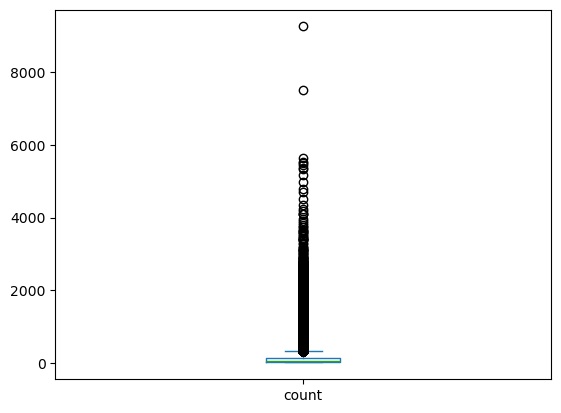

In [196]:
n_unique_users = ratings['userId'].nunique()
 
user_count = ratings.groupby('userId').size().reset_index(name='count')
# user_count["percentage"] = round((user_count["count"]/user_count["count"].sum())*100, 2)
user_count["percentage"] = (user_count["count"]/total)*100

user_count = user_count.sort_values(by="count", ascending=False)
# pc = int(len(user_count) * 0.01)
# top_raters = user_count[user_count["count"]>2000]
# print(len(top_raters))
# print(top_raters["percentage"].sum())

# print(top_1000.sort_values(by="percentage", ascending=False))

print("total size of unique users ratings")
print(user_count.size)
print("description of unique users ratings")
print(user_count["count"].describe())
print("The top rating provider")
print(user_count.head(1))
user_count["count"].plot.box()
# plt.hist(user_count["count"], bins=1000 )
# plt.yscale("log")


Its clear to see there are some outlyer users who provider a dispraportionate amount of reviews. The top rating provider is user 20231 with 9245 ratings has provided 0.04 of all the ratings in the dataset. this leads me to want to know how many of the all the movies has this user rated? 

In [195]:

n_unique_movies = ratings['movieId'].nunique()
print(f"total unique movies= {n_unique_movies}")
print(f"total unique users= {n_unique_users}")

total unique movies= 26744
total unique users= 138493


I know would like to know about the movies people are rating:
- what is the most rated movie?
- what is the least?
- is any movie not rated? 

In [199]:
movie_count = ratings.groupby('movieId').size().reset_index(name='count')
# user_count["percentage"] = round((user_count["count"]/user_count["count"].sum())*100, 2)
movie_count["percentage"] = (movie_count["count"]/total)*100

movie_count = movie_count.sort_values(by="count", ascending=False)
print(movie_count.describe())
print("the most rated movie is")
print(movie_count.head(1))
print("the least rated movie is")
print(movie_count.tail(1))

              count    percentage
count  26744.000000  26744.000000
mean     747.841123      0.003739
std     3085.818268      0.015429
min        1.000000      0.000005
25%        3.000000      0.000015
50%       18.000000      0.000090
75%      205.000000      0.001025
max    67310.000000      0.336546
the most rated movie is
     movieId  count  percentage
9785     296  67310    0.336546
the least rated movie is
      movieId  count  percentage
13372   47250      1    0.000005


(array([496., 486., 454., 436., 394., 422., 344., 418., 361., 327., 310.,
        305., 252., 274., 278., 221., 249., 195., 282., 214., 214., 211.,
        201., 193., 164., 169., 172., 182., 132., 150., 149., 139., 122.,
        127., 130., 135., 100., 103., 114.,  86.,  94., 113.,  80.,  97.,
        102.,  78.,  75.,  77.,  67.,  89.,  76.,  78.,  79.,  72.,  69.,
         66.,  69.,  63.,  46.,  57.,  56.,  60.,  47.,  45.,  50.,  40.,
         48.,  49.,  34.,  39.,  51.,  40.,  32.,  24.,  44.,  47.,  46.,
         26.,  40.,  48.,  34.,  37.,  37.,  45.,  38.,  26.,  45.,  35.,
         27.,  26.,  23.,  29.,  28.,  26.,  24.,  25.,  14.,  29.,  15.,
         30.,  19.,  27.,  28.,  14.,  16.,  17.,  20.,  19.,  20.,  13.,
         17.,  15.,  16.,  14.,  20.,  16.,  21.,  17.,   6.,  12.,  20.,
         20.,  18.,   6.,  13.,  14.,  10.,  13.,   9.,   7.,  15.,  11.,
         11.,   8.,  11.,   6.,   7.,  12.,  11.,   7.,   8.,   7.,   6.,
         11.,  10.,   4.,   1.,   2., 

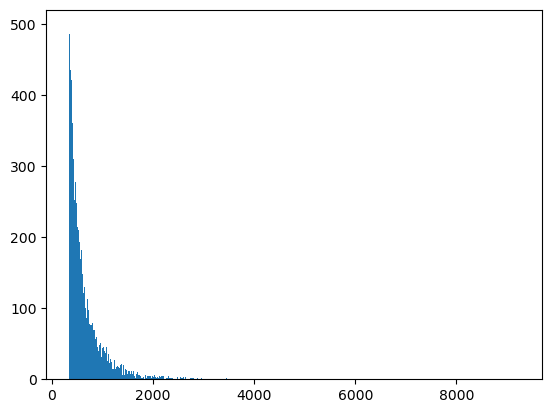

In [185]:
Q1 = user_count['count'].quantile(0.25)
Q3 = user_count['count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = user_count[(user_count['count'] < lower_bound) | (user_count['count'] > upper_bound)]
# print(outliers)
# outliers['count'].plot.hist()
plt.hist(outliers["count"], bins=1000 )

dataset count with outlyer rating providers removed 43480860
amount of unique users with outlyer rating providers removed 249424


<Axes: >

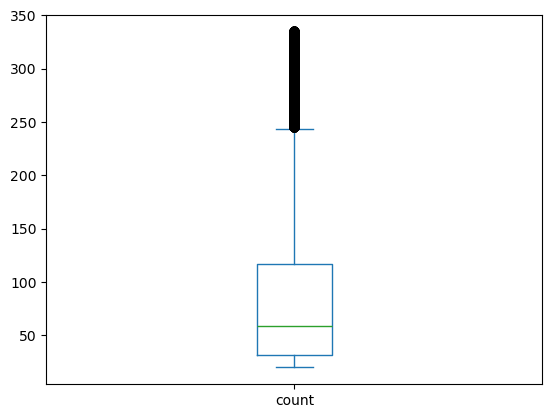

In [186]:
ratings_minus_outlier_users = ratings[~ratings["userId"].isin(outliers["userId"])]

users_count_2 = ratings_minus_outlier_users.groupby('userId').size().reset_index(name='count')

print(f"dataset count with outlyer rating providers removed {ratings_minus_outlier_users.size}")
print(f"amount of unique users with outlyer rating providers removed {users_count_2.size}")
users_count_2["count"].plot.box()

Next lets look the at timestamp variable

              count  percentage
count  4.000000e+00    4.000000
mean   5.000066e+06   25.000000
std    1.968838e+05    0.984406
min    4.801330e+06   24.006334
25%    4.874225e+06   24.370803
50%    4.972644e+06   24.862896
75%    5.098486e+06   25.492092
max    5.253644e+06   26.267875
the season when most ratings happen
   season    count  percentage
3  Winter  5253644   26.267875
the season when least ratings happen
   season    count  percentage
1  Spring  4801330   24.006334


<Axes: ylabel='percentage'>

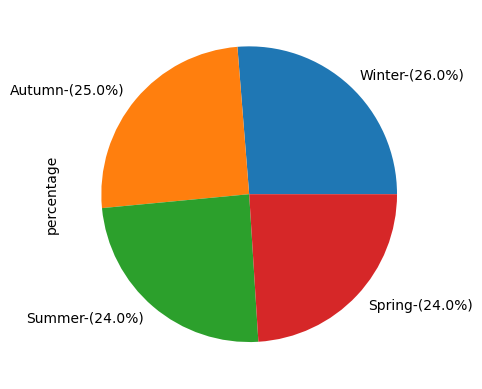

In [212]:
# print(ratings["timestamp"].describe())

ratings["year"] = ratings["timestamp"].dt.year
ratings["month"] = ratings["timestamp"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

ratings["season"] = ratings["timestamp"].dt.month.apply(get_season)
# print(ratings)

season_count = ratings.groupby(["season"]).size().reset_index(name='count')
# user_count["percentage"] = round((user_count["count"]/user_count["count"].sum())*100, 2)
season_count["percentage"] = (season_count["count"]/total)*100

season_count = season_count.sort_values(by="count", ascending=False)
print(season_count.describe())
print("the season when most ratings happen")
print(season_count.head(1))
print("the season when least ratings happen")
print(season_count.tail(1))
labels = [f"{season}-({round(percentage, 0)}%)" for season, percentage in zip(season_count["season"], season_count["percentage"])]
season_count["percentage"].plot.pie(labels=labels)

In [16]:
# # tags

# tags = pd.DataFrame()  # initialize an empty dataframe
# for index, chunk in enumerate(pd.read_csv('../ml-20m/tags.csv',
#                          dtype={'userId': str, 'movieId': str, "tag": str, 'timestamp': int},
#                          chunksize=chunksize,
#                          parse_dates=['timestamp'],
#                          date_parser=pd.to_datetime
#                          )):
#     # Perform operations on the chunk
#     # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
#     tags = pd.concat([tags, chunk])
#     print(f"Chunk {index} loaded")
# print("tags dataset loaded")

In [17]:
# # movies

# movies = pd.DataFrame()  # initialize an empty dataframe
# for index, chunk in enumerate(pd.read_csv('../ml-20m/movies.csv',
#                          dtype={'movieId': str, 'title': str, "genres": str},
#                          chunksize=chunksize,
#                          )):
#     # Perform operations on the chunk
#     # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
#     movies = pd.concat([movies, chunk])
#     print(f"Chunk {index} loaded")
# print("movies dataset loaded")


In [18]:
# # links

# links = pd.DataFrame()  # initialize an empty dataframe
# for index, chunk in enumerate(pd.read_csv('../ml-20m/links.csv',
#                          dtype={'imdbId': str, 'movieId': str, "tmdbId": str},
#                          chunksize=chunksize,
#                          )):
#     # Perform operations on the chunk
#     # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
#     links = pd.concat([links, chunk])
#     print(f"Chunk {index} loaded")

# print("links dataset loaded")


In [19]:
# print(movies.info())
# print(movies.head(10))

In [20]:
# print(tags.info())
# print(tags.head(10))

In [21]:
# print(links.info())
# print(links.head(10))

Now I have my import function down, I want to continue in a DRY coding style. I will create an array of dataframe and import each table into the dataframe using a function  

In [22]:
# # import function
# def import_dataset(ds, df, dtype={}, parse_dates=[], chunksize=chunksize):
    
#     for index, chunk in enumerate(pd.read_csv(f'../ml-20m/{ds}.csv',
#                          dtype=dtype,
#                          chunksize=chunksize,
#                          parse_dates=parse_dates,
#                          date_parser=pd.to_datetime
#                          )):
#         # Perform operations on the chunk
#         df = pd.concat([df, chunk])
#         print(f"{ds} chunk {index} loaded")
#     print(ds)
#     print(df.info())
#     print(df.head(5))
        

# ratings = pd.DataFrame()
# movies = pd.DataFrame()
# tags = pd.DataFrame()
# links = pd.DataFrame()

# df_array = [
#     {
#         "ratings":ratings, 
#         "dtype": {'userId': int, 'movieId': int, "rating": float, 'timestamp': int},
#         "parse_dates":['timestamp']
#     },
#     {
#         "movies":movies, 
#         "dtype": {'movie': int, 'title': str, "genres": str},
#         # "parse_dates":['timestamp']
#     },
#     {
#         "tags":tags,
#         "dtype": {'userId': int, 'movieId': int, "tag": str, 'timestamp': int},
#         "parse_dates":['timestamp']
#     },
#     {
#         "links":links,
#          "dtype": {'imdbId': int, 'movieId': int, "tmdbId": float},
#     }
        
# ]

# for item in df_array:
#     ds_name = [*item.keys()][0]
#     ds_df = [*item.values()][0]
#     # ds_dt = [*item.values()][2]
#     # ds_pd = [*item.values()][3]
#     import_dataset(ds_name, ds_df)
#     # for index, ds, df in enumerate(item.items()):
#     #     if index == 0:
            
    
# # for item in df_array:
# #     for ds, df in item.items():
# #         print(ds.head(20))
#     # print(ds)

In [23]:
# print(ratings_2.head(5))
